![Cover1](Assignment_cover_page-0001.jpg)

![Cover2](Assignment_cover_page-0002.jpg)

<h1 style="text-align:center">Abstract</h1>

<p style="text-align:justify">This document presents an analysis of Alzheimer's disease-related features using a dataset comprising 373 samples and 10 columns. The primary objective is to predict the target variable 'Group,' which categorizes individuals into Demented, Nondemented, or Converted. The dataset includes various demographic and clinical attributes such as gender, age, education, socioeconomic status, and cognitive assessment scores.

The data encompasses categorical nominal, discrete, and continuous variables, providing a diverse set of information for analysis. The presented code serves as a foundational framework for Alzheimer's disease analysis, demonstrating the use of machine learning techniques to derive insights from the provided dataset. </p>

<h1 style="text-align:center">TABLE OF CONTENTS</h1>

- [Abstract](#abstract)
- [Background](#background)
- [Objective](#objective)
- [Dataset Details](#dataset-details)
- [Significance](#significance)
- [Methodology](#methodology)
  - [Implementation](#implementation)
    - [Importing Libraries](#importing-libraries)
    - [Data Loading and Exploration](#data-loading-and-exploration)
      - [Dataset Details](#dataset-details-1)
      - [Data Categories](#data-categories)
    - [Data Cleaning](#data-cleaning)
      - [Handling Missing Values](#handling-missing-values)
      - [Handling Outliers](#handling-outliers)
      - [Encoding Categorical Variables](#encoding-categorical-variables)
      - [Duplicate Data Handling](#duplicate-data-handling)
    - [Exploratory Data Analysis](#exploratory-data-analysis)
      - [Univariate Analysis](#univariate-analysis)
      - [Bivariate Analysis](#bivariate-analysis)
      - [Multivariate Analysis](#multivariate-analysis)
    - [Feature Engineering](#feature-engineering)
    - [Data Preparation](#data-preparation)
    - [Model Building](#model-building)
    - [Model Evaluation](#model-evaluation)
    - [Evaluation Result](#evaluation-result)
- [Conclusion](#conclusion)


<h1 style="text-align:center">Alzheimer's Disease Prediction</h1>

# Background

<p style="text-align:justify">Alzheimer's disease is a progressive neurodegenerative disorder that affects cognitive functions, memory, and behavior. Early detection of Alzheimer's disease is crucial for timely intervention and improved patient outcomes. Machine learning models can play a significant role in predicting the likelihood of Alzheimer's disease based on relevant features.</p>

# Objective

<p style="text-align:justify">The primary objective of this project is to develop a predictive model that can accurately classify individuals into different groups based on Alzheimer's-related features. The target variable, 'Group,' represents the diagnostic status of individuals and has three unique values: Demented, Nondemented, and Converted. By analyzing features such as gender, age, education, cognitive assessments, and brain metrics, the model aims to identify patterns indicative of Alzheimer's disease.</p>

# Dataset Details

**Source:** *https://www.kaggle.com/datasets/brsdincer/alzheimer-features*

The dataset contains information on 373 individuals and includes the following columns:

1. **Group**: Target variable indicating the diagnostic group (Demented, Nondemented, Converted).
2. **M/F**: Gender of the individuals (Male/Female).
3. **Age**: Age of the individuals.
4. **EDUC**: Years of education.
5. **SES**: Socioeconomic Status, ranging from 1 (Low) to 5 (High).
6. **MMSE**: Mini Mental State Examination.
7. **CDR**: Clinical Dementia Rating.
8. **eTIV**: Estimated total intracranial volume.
9. **nWBV**: Normalized Whole Brain Volume.
10. **ASF**: Atlas Scaling Factor.

The dataset comprises categorical nominal, discrete, and continuous variables, providing a diverse set of features for analysis.

# Significance

<p style="text-align:justify">Early detection and accurate classification of Alzheimer's disease can lead to improved patient care, intervention planning, and resource allocation. By leveraging machine learning techniques, this project aims to contribute to the development of tools for assisting healthcare professionals in the diagnosis and management of Alzheimer's disease.</p>

# Methodology

The project will involve the following steps:

1. **Data Preprocessing**: Understand the characteristics of the dataset, handle missing values, and preprocess the data for model training.

2. **Exploratory Data Analysis**: Perform Exploratory Data Analysis to understand correlation, visualize data distribution.

3. **Model Development**: Utilize machine learning algorithms, particularly classification models, to predict the 'Group' variable based on the selected features.

4. **Model Evaluation**: Assess the performance of the developed model using metrics such as accuracy, precision, recall, and F1-score.

5. **Interpretation and Insights**: Gain insights into the importance of different features and understand the model's decision-making process.

# Implementation 

Code Link: https://www.kaggle.com/code/samiatisha/alzheimer-features-prediction

The full Machine Learning and Data Analysis Implementation documentation is given below

## Importing Libraries

In [218]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings


warnings.filterwarnings('ignore')

## 1. Data Loading and Exploration:
The initial steps involve loading the dataset and understanding the data by viewing summary statistics.

In [219]:
# Loading the dataset to pandas dataframe
df = pd.read_csv('/kaggle/input/alzheimer-features/alzheimer.csv')

In [220]:
df.sample(5)

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
37,Converted,M,82,20,1.0,28.0,0.5,1606,0.677,1.093
321,Demented,F,76,14,3.0,28.0,0.5,1236,0.764,1.419
349,Nondemented,M,68,14,3.0,26.0,0.0,1444,0.778,1.216
306,Nondemented,F,83,13,2.0,30.0,0.0,1335,0.732,1.314
221,Demented,M,70,16,1.0,25.0,0.5,1568,0.696,1.119


In [221]:
df.shape

(373, 10)

In [222]:
df.columns

Index(['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')

In [223]:
df.dtypes

Group     object
M/F       object
Age        int64
EDUC       int64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
dtype: object

In [224]:
df.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


### Dataset Details

- **Number of Samples**: 373
- **Number of Features**: 10
- **Target Variable**: 'Group' (Demented, Nondemented, Converted)
- **Features**: 'M/F', 'Age', 'EDUC', 'eTIV', 'SES', 'MMSE', 'CDR', 'nWBV', 'ASF'

### Data Categories

- **Categorical Nominal**: 'M/F', 'Group'
- **Discrete**: 'Age', 'EDUC', 'eTIV'
- **Continuous**: 'SES', 'MMSE', 'CDR', 'nWBV', 'ASF'

## Data Cleaning

- Handle Missing Values
- Handle Outliers
- Handle Data Inconsistency
- Data Type Issues Resolve
- Duplicate Data Deletion

### Handling Missing Values
- Check Missing Values

In [225]:
df.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

There are missing values in SES and MMSE column. Since both variables are continuous variables we can perform imputation. To choose the right imputation we must check outliers and normality.

#### Checking Outliers and Normality


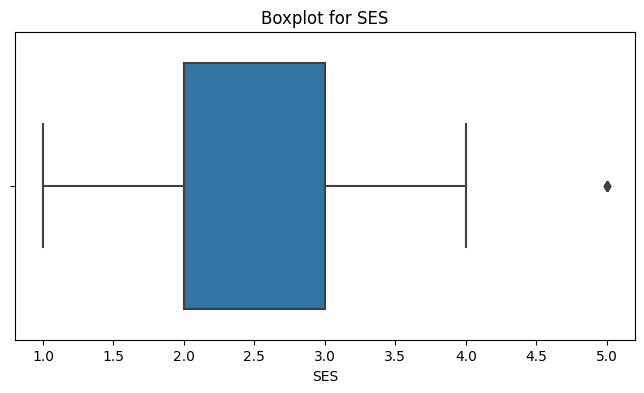

In [226]:
# Function to check for outliers using box plots
def check_outliers(df, column_name):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column_name])
    plt.title(f'Boxplot for {column_name}')
    plt.show()

# Function to check for normality using Q-Q plot and Shapiro-Wilk test
def check_normality(df, column_name):
    # Q-Q plot
    plt.figure(figsize=(8, 4))
    qqplot(df[column_name], line='s')
    plt.title(f'Q-Q Plot for {column_name}')
    plt.show()

    # Shapiro-Wilk test for normality
    stat, p_value = shapiro(df[column_name])
    print(f'Shapiro-Wilk test for {column_name}:')
    print(f'Statistic: {stat}, p-value: {p_value}')
    if p_value > 0.05:
        print(f'The data for {column_name} appears to be normally distributed.')
    else:
        print(f'The data for {column_name} does not appear to be normally distributed.')

check_outliers(df, 'SES')

<Figure size 800x400 with 0 Axes>

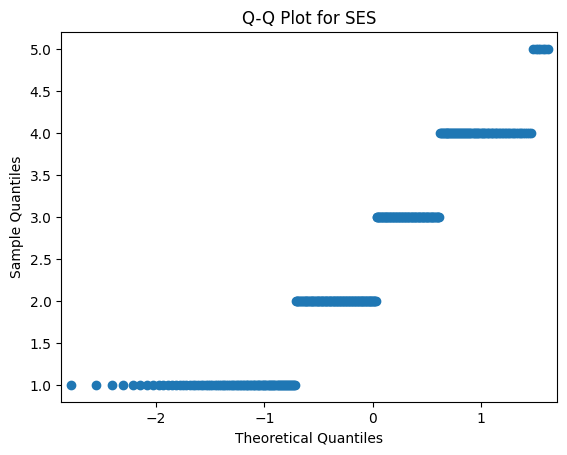

Shapiro-Wilk test for SES:
Statistic: nan, p-value: 1.0
The data for SES appears to be normally distributed.


In [227]:
check_normality(df, 'SES')


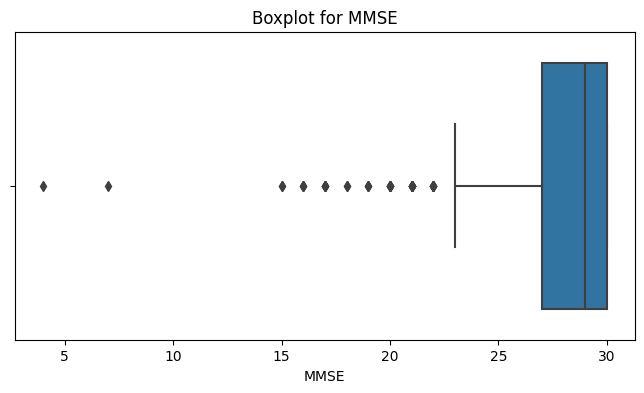

In [228]:
check_outliers(df,  'MMSE')


<Figure size 800x400 with 0 Axes>

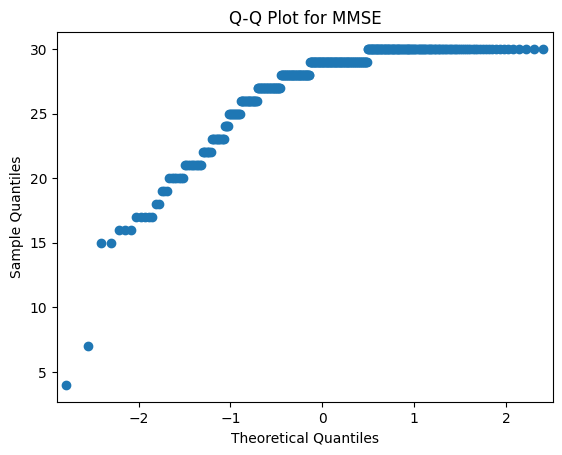

Shapiro-Wilk test for MMSE:
Statistic: nan, p-value: 1.0
The data for MMSE appears to be normally distributed.


In [229]:
check_normality(df,  'MMSE')

Since in both variables, outliers are minimal and the data is approximately normally distributed, **Mean Imputation** can be considered.
#### Mean Imputation

In [230]:
# Replace with Mean value
for i in column_of_interest:
    mean = df[i].mean()
    df[i].replace(np.nan, mean, inplace=True)

In [231]:
df.isnull().sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

## Exploratory Data Analysis
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis 

### Univariate Analysis

Univariate analysis involves examining the distribution and characteristics of individual variables. Below is the code for univariate analysis for each feature in the dataset:

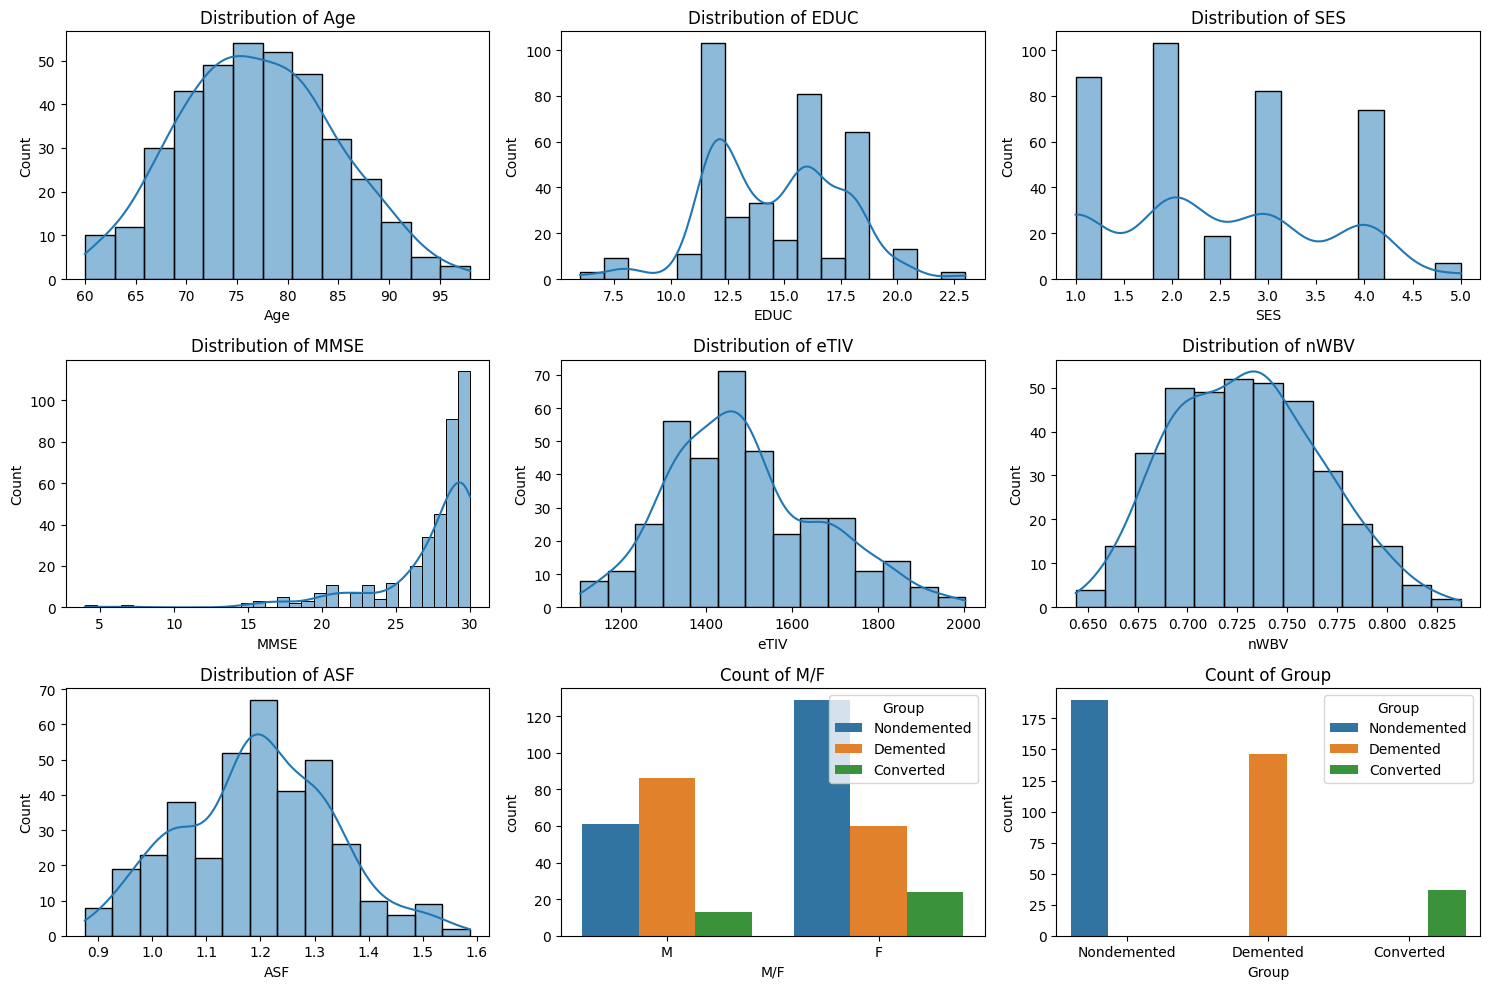

In [232]:
# Set up the figure size
plt.figure(figsize=(15, 10))

# Univariate Analysis for Numeric Features
numeric_features = ['Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

# Univariate Analysis for Categorical Features
categorical_features = ['M/F', 'Group']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i + 7)  # Adjust subplot position for categorical features
    sns.countplot(data=df, x=feature, hue='Group')
    plt.title(f'Count of {feature}')

plt.tight_layout()
plt.show()

#### Univariate Analysis Summary

**Numeric Features:**

1. **Age:**
   - The distribution of ages appears to be approximately normal.

2. **EDUC:**
   - There are three extreme upper bars at 100, 80, and 75.
   - The majority of values are lower than 40.

3. **SES (Socioeconomic Status):**
   - The distribution shows a wavy pattern.

4. **MMSE (Mini Mental State Examination):**
   - The distribution appears to be left-skewed.

5. **eTIV (Estimated Total Intracranial Volume):**
   - The distribution looks slightly right-skewed.

6. **nWBV (Normalized Whole Brain Volume):**
   - The distribution seems to be approximately normal.

7. **ASF (Atlas Scaling Factor):**
   - The distribution looks almost normal.

#### Categorical Features:

1. **M/F (Gender):**
   - In the 'Nondemented' group, the 'Female' bar is larger than 'Male.'
   - In the 'Demented' group, the 'Male' bar is larger than 'Female.'
   - In the 'Converted' group, the 'Female' bar is slightly larger than 'Male.'

2. **Group (Diagnostic Group):**
   - The order of frequency is 'Nondemented' > 'Demented' > 'Converted.'

### Recommendations:

1. Further investigate the extreme values in 'EDUC' and consider handling them if necessary.
2. Explore the wavy pattern in 'SES' to understand its implications.
3. Consider the left-skewed distribution of 'MMSE' and assess its impact on model performance.
4. Note the differences in gender distribution across different diagnostic groups.

These observations provide valuable insights into the characteristics of each feature, aiding in a more informed interpretation of the dataset.

### Bivariate Analysis

Bivariate analysis involves examining the relationships between pairs of variables. Below is the code for bivariate analysis for each feature with respect to the target variable 'Group':

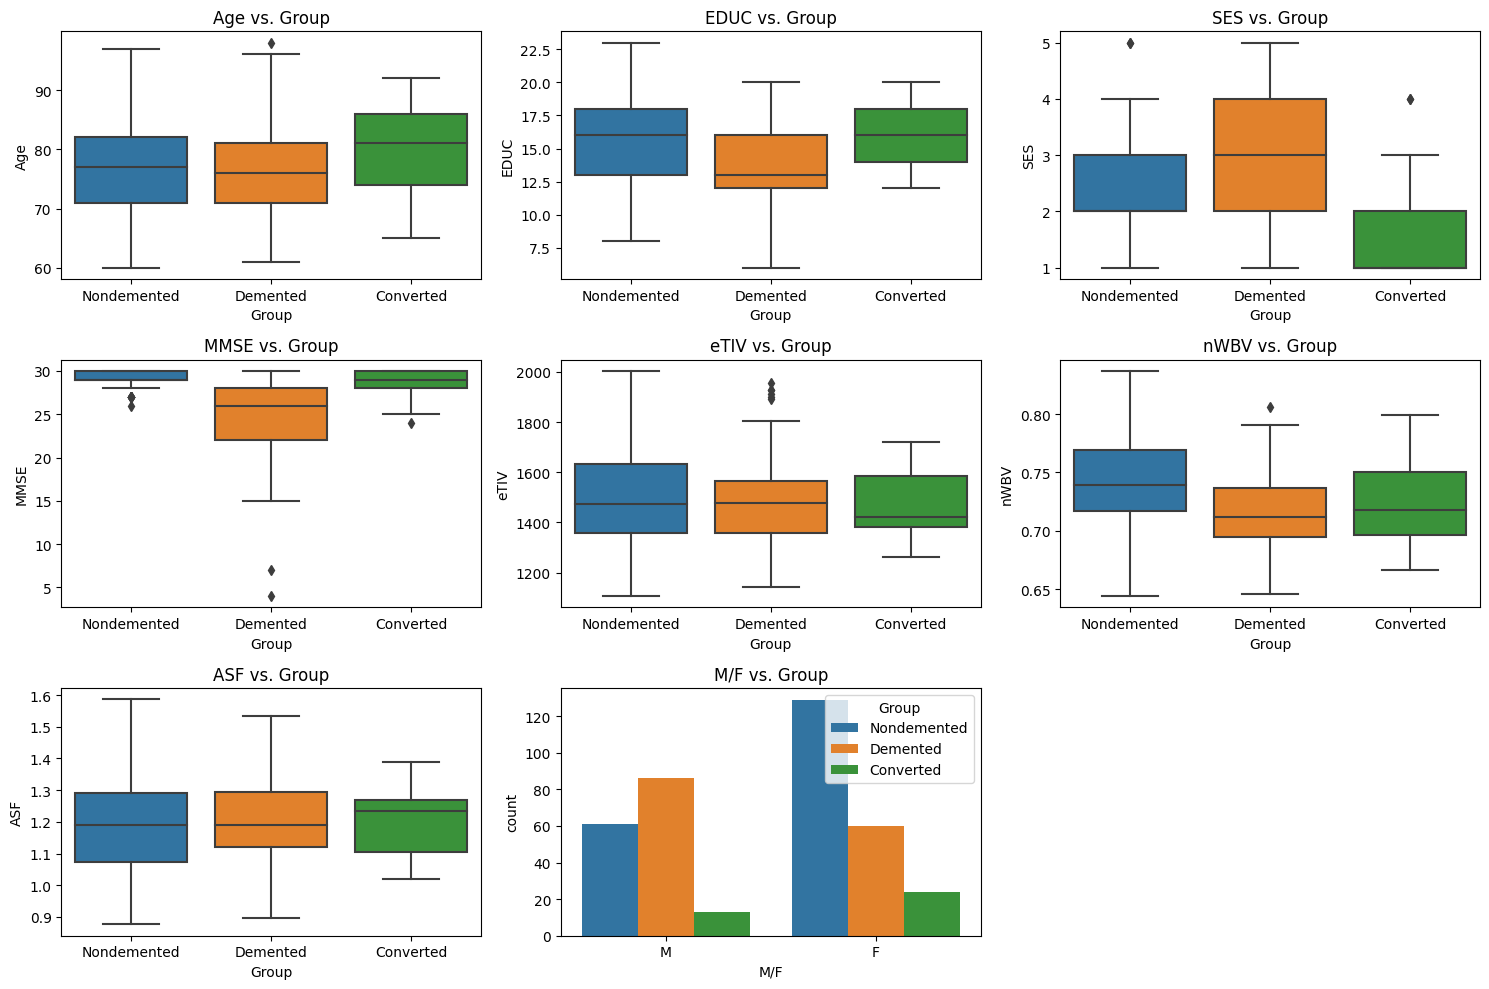

In [233]:
# Set up the figure size
plt.figure(figsize=(15, 10))

# Bivariate Analysis for Numeric Features
numeric_features = ['Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Group', y=feature, data=df)
    plt.title(f'{feature} vs. Group')

# Bivariate Analysis for Categorical Features
categorical_features = ['M/F']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i + 7)  # Adjust subplot position for categorical features
    sns.countplot(x=feature, hue='Group', data=df)
    plt.title(f'{feature} vs. Group')

plt.tight_layout()
plt.show()


#### Bivariate Analysis Summary

**Age vs. Group:**
- Median age for 'Nondemented' and 'Demented' is around 75, while 'Converted' is around 82.
- 'Converted' group has a wider box, but the range (min to max) is less than 'Demented' and 'Nondemented.'
- 'Demented' group has minimal outliers.

**EDUC vs. Group:**
- Median education years for 'Nondemented' and 'Converted' is around 16.0, while 'Demented' is 12.5.
- 'Nondemented' has the widest box and the highest maximum, while 'Converted' has the lowest maximum and highest minimum.
- 'Demented' has the lowest minimum. No outliers are present in any group.

**SES vs. Group:**
- 'Nondemented' and 'Demented' groups have minimal outliers in socioeconomic status ('SES').
- 'Demented' group is the widest, with a median around 3.
- Median values are not clearly visible in other groups, and 'Converted' doesn't have a lower whisker.

**MMSE vs. Group:**
- 'Nondemented' and 'Demented' groups have minimal outliers in Mini Mental State Examination ('MMSE').
- 'Demented' group is the widest, with a median of 25. The rest of the boxes are higher than 'Demented,' and 'Converted' has a median of 25.5.
- 'Nondemented' doesn't have a visible median.

**eTIV vs. Group:**
- 'Demented' group has outliers in estimated total intracranial volume ('eTIV').
- 'Nondemented' has the widest box with a median around 1500. 'Demented' also has the same median and the smallest box. 'Converted' has a median of 1400.

**nWBV vs. Group:**
- 'Demented' group has some minimal outliers in normalized whole brain volume ('nWBV').
- 'Nondemented' and 'Converted' have almost the same widest boxes.
- Median values for all groups exist between 0.7 to 0.75.

**ASF vs. Group:**
- No outliers in atlas scaling factor ('ASF').
- 'Nondemented' has the widest box, with median values between 1.2 to 1.25.

**M/F (Gender) vs. Group:**
- In 'Nondemented,' the 'Female' bar is larger than 'Male.'
- In 'Demented,' the 'Male' bar is larger than 'Female.'
- In 'Converted,' the 'Female' bar is slightly larger than 'Male.'

**General Observations:**
- The presence of outliers and the width of boxes in box plots provide insights into the spread and distribution of each variable within different diagnostic groups.
- Differences in medians and quartiles highlight potential distinctions in features among 'Nondemented,' 'Demented,' and 'Converted' groups.

**Recommendations:**
- Further investigate the features with outliers to understand their impact on model performance.
- Consider the differences in educational years and socioeconomic status among the groups.
- Analyze the patterns in Mini Mental State Examination scores and intracranial volume across different diagnostic groups.

### Multivariate Analysis

Multivariate analysis involves examining the relationships between multiple variables simultaneously. 

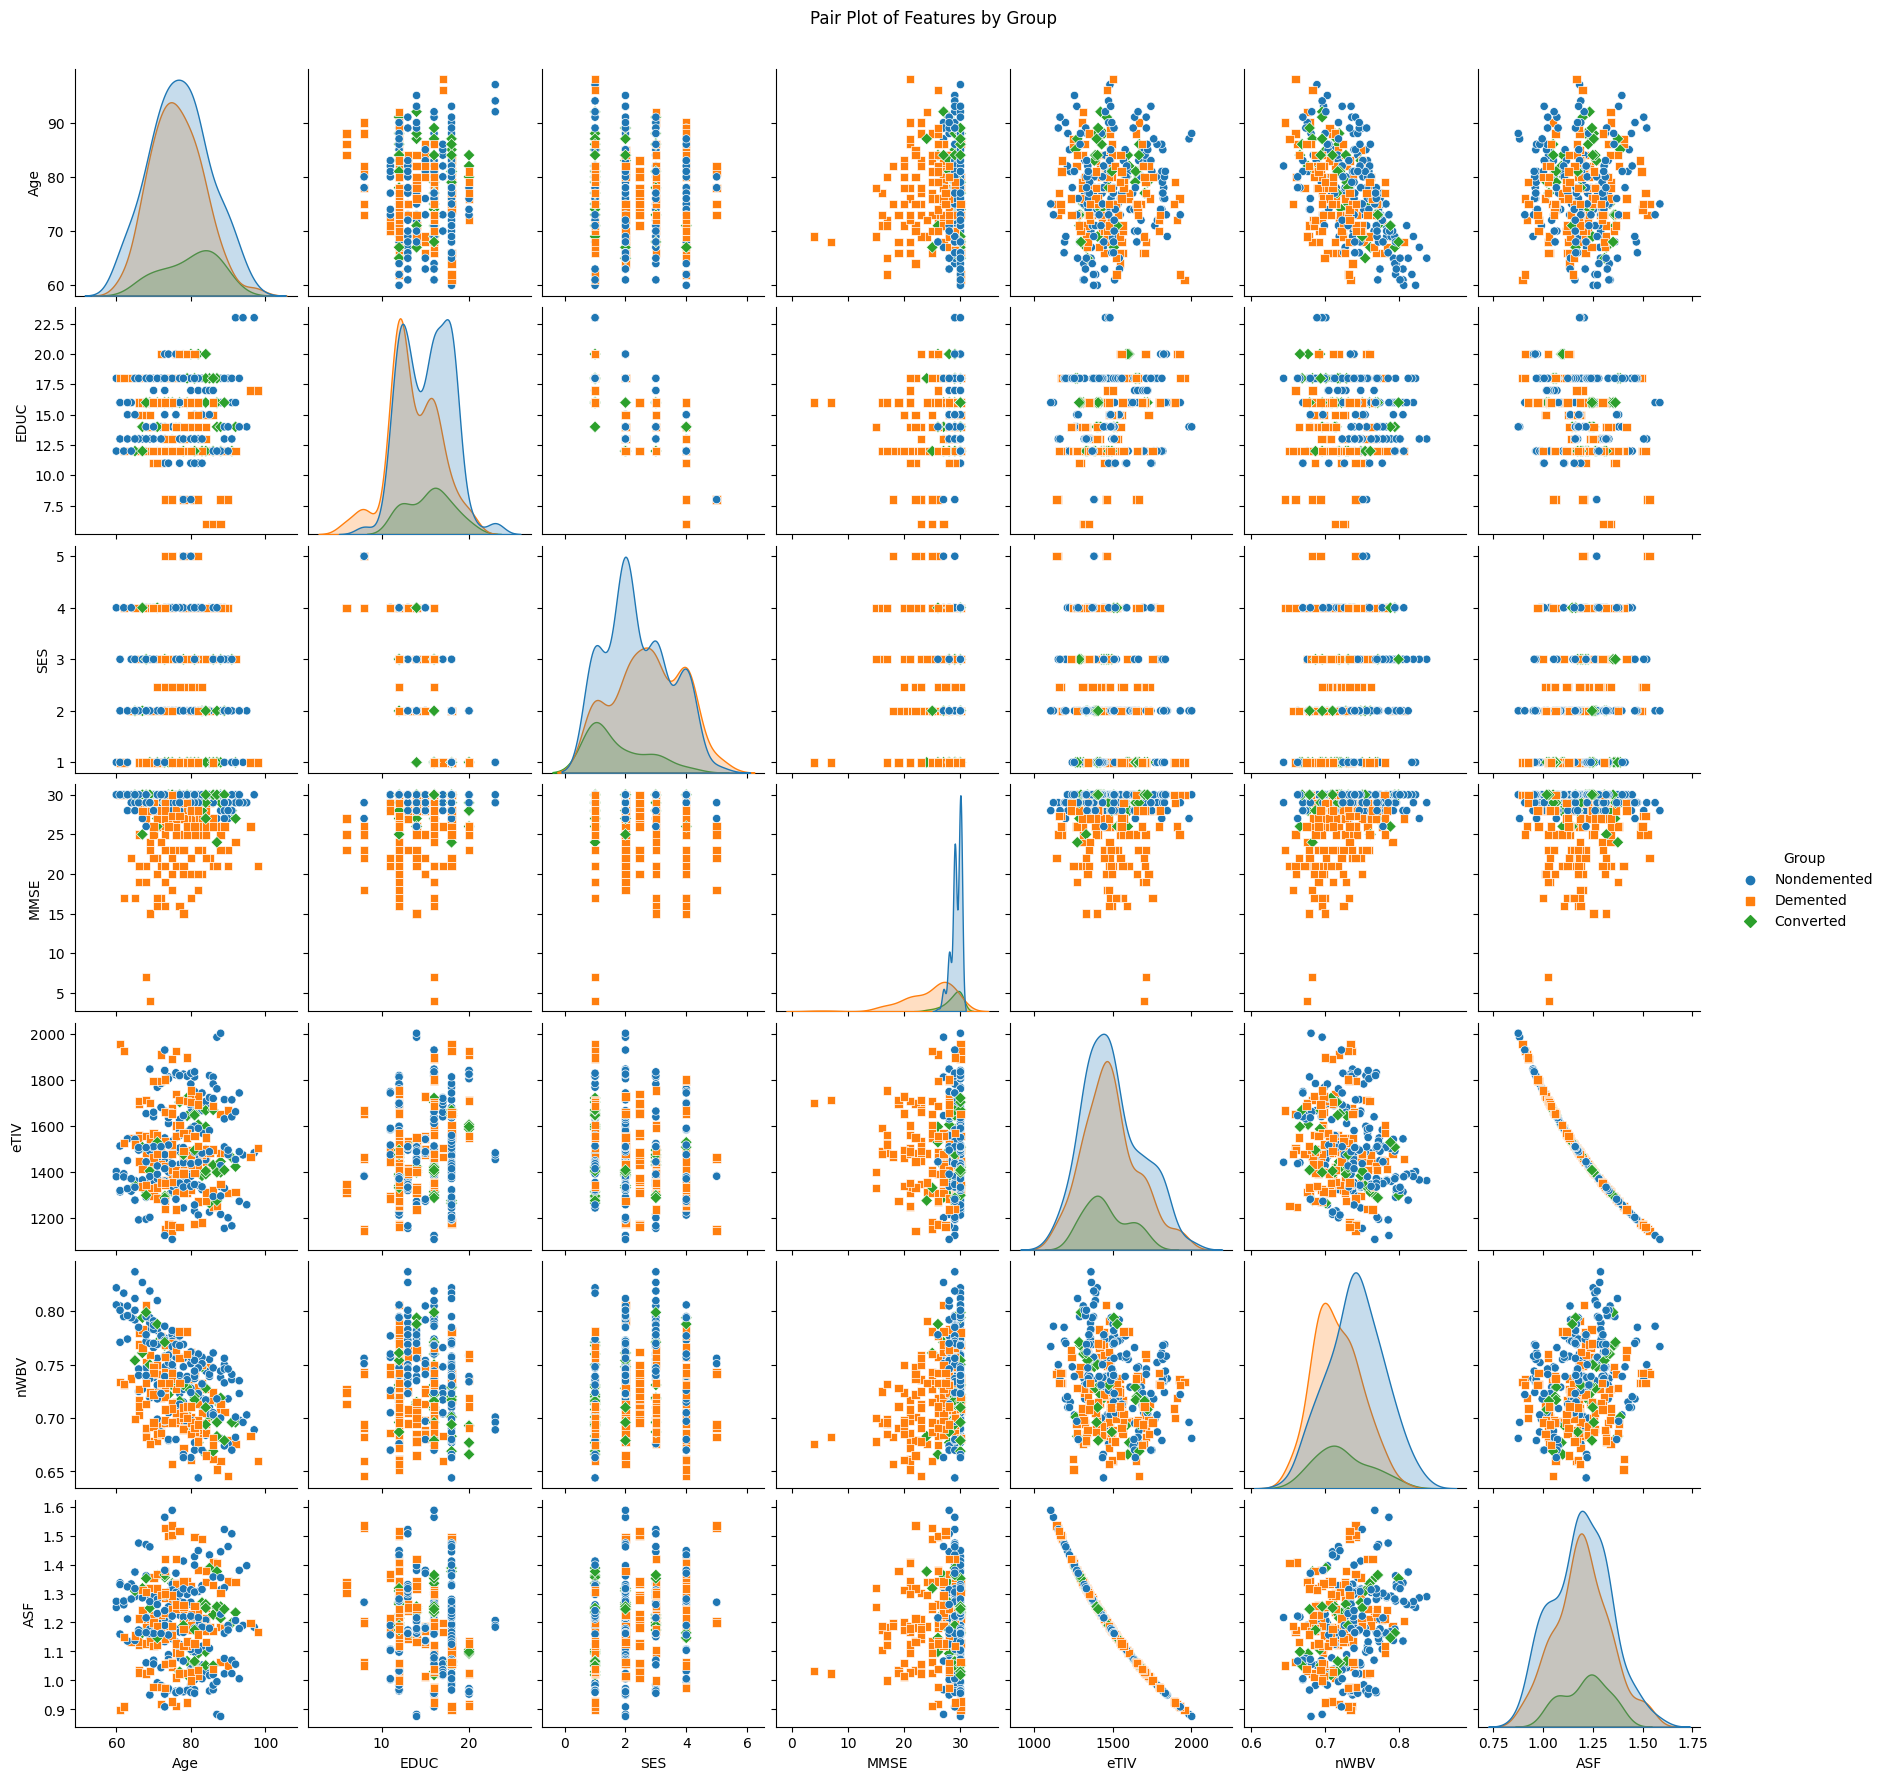

In [234]:
# Select relevant features including the target variable 'Group'
selected_features = ['Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF', 'M/F', 'Group']

# Create a pair plot
sns.pairplot(df[selected_features], hue='Group', markers=['o', 's', 'D'], diag_kind='kde', height=2.5)
plt.suptitle('Pair Plot of Features by Group', y=1.02)
plt.show()


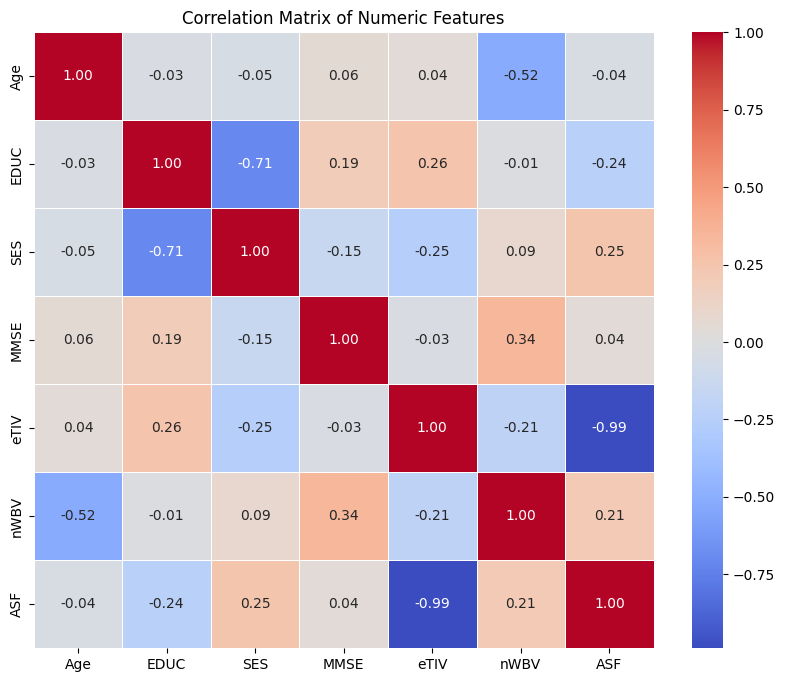

In [235]:
# Create a correlation matrix
correlation_matrix = df[['Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


#### Multivariate Analysis Summary

**Pair Plot:**

The pair plot provides a visual representation of the relationships between multiple variables, considering the target variable 'Group.'

1. **Age vs. nWBV:**
   - The pair plot suggests a low negative correlation (-0.52) between age and normalized whole brain volume (nWBV).
   - As age increases, there is a tendency for nWBV to decrease.

2. **eTIV vs. ASF:**
   - The pair plot indicates a perfect negative correlation (-0.99) between estimated total intracranial volume (eTIV) and atlas scaling factor (ASF).
   - This means that as eTIV increases, ASF tends to decrease linearly.

**Correlation Matrix:**

The correlation matrix quantifies the linear relationships between numeric features.

1. **Age vs. nWBV:**
   - Correlation coefficient: -0.52
   - Interpretation: A moderate negative correlation, confirming the observation from the pair plot.

2. **eTIV vs. ASF:**
   - Correlation coefficient: -0.99
   - Interpretation: A perfect negative correlation, indicating a strong linear relationship between eTIV and ASF.

#### General Observations:

- Multivariate analysis helps uncover complex relationships between multiple variables simultaneously.
- The negative correlation between age and nWBV suggests a potential relationship between age and changes in brain volume.
- The perfect negative correlation between eTIV and ASF suggests a linear relationship where one variable increases while the other decreases.

#### Recommendations:

- Further investigate the relationship between age and nWBV to understand the implications for brain health.
- Consider the impact of eTIV and ASF correlation on model interpretability and potential multicollinearity in predictive modeling.

These observations serve as a foundation for deeper exploration and potentially guide additional analyses or feature engineering steps in your study.

## Data Cleaning

### Handling Outliers

Based on the information from the EDA, there are outliers in several features, and skewed distributions in 'MMSE'.

In [236]:
# Outlier treatment using IQR for numeric features
numeric_features = ['Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']

for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
    df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])

# Apply logarithmic transformation to 'MMSE' and 'eTIV'
df['MMSE'] = np.log1p(df['MMSE'])

### Encoding Categorical Variables
#### Label Encoding for 'Group':

In [237]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to 'Group'
df['Group'] = label_encoder.fit_transform(df['Group'])

#### One-Hot Encoding for 'M/F':

In the one-hot encoding step, pd.get_dummies is used to create binary columns for each category in 'M/F,' and the drop_first=True parameter is set to drop one of the binary columns to avoid multicollinearity.

In [238]:
# Perform one-hot encoding for 'M/F'
df = pd.get_dummies(df, columns=['M/F'], drop_first=True)
df.sample(5)

,Group,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_M
330,1,79.0,20.0,1.000000,3.258097,2.0,1710.0,0.760,1.026,True
32,2,86.0,12.0,3.000000,3.332205,0.0,1813.0,0.761,0.968,True
136,1,78.0,8.0,4.500000,3.178054,1.0,1462.0,0.691,1.200,False
256,1,70.0,16.0,3.000000,3.401197,0.5,1463.0,0.749,1.200,True
4,1,80.0,12.0,2.460452,3.157000,0.5,1698.0,0.701,1.034,True


### Duplicate Data Handling

In [239]:
# Function to detect duplicate rows
def detect_duplicates(dataframe):
    duplicate_rows = dataframe[dataframe.duplicated()]
    return duplicate_rows

# Function to remove duplicate rows
def remove_duplicates(dataframe):
    dataframe_no_duplicates = dataframe.drop_duplicates()
    return dataframe_no_duplicates

# Example usage
# Display duplicate rows
duplicate_rows = detect_duplicates(df)
print("Duplicate Rows:")
print(duplicate_rows)

# Remove duplicate rows
df_no_duplicates = remove_duplicates(df)
print("\nDataFrame after Removing Duplicates:")
print(df_no_duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [Group, Age, EDUC, SES, MMSE, CDR, eTIV, nWBV, ASF, M/F_M]
Index: []

DataFrame after Removing Duplicates:
     Group   Age  EDUC       SES      MMSE  CDR    eTIV   nWBV    ASF  M/F_M
0        2  87.0  14.0  2.000000  3.332205  0.0  1957.0  0.696  0.883   True
1        2  88.0  14.0  2.000000  3.433987  0.0  1957.0  0.681  0.876   True
2        1  75.0  12.0  2.460452  3.178054  0.5  1678.0  0.736  1.046   True
3        1  76.0  12.0  2.460452  3.367296  0.5  1738.0  0.713  1.010   True
4        1  80.0  12.0  2.460452  3.157000  0.5  1698.0  0.701  1.034   True
..     ...   ...   ...       ...       ...  ...     ...    ...    ...    ...
368      1  82.0  16.0  1.000000  3.367296  0.5  1693.0  0.694  1.037   True
369      1  86.0  16.0  1.000000  3.295837  0.5  1688.0  0.675  1.040   True
370      2  61.0  13.0  2.000000  3.433987  0.0  1319.0  0.801  1.331  False
371      2  63.0  13.0  2.000000  3.433987  0.0  1327.0  0.796  1.323  False
372  

## Feature Engineering

### 1. Age Categories:
Bin the 'Age' variable into categories such as 'Young,' 'Middle-Aged,' and 'Elderly' to capture potential non-linear relationships.

In [240]:
# Create age categories
bins = [0, 60, 75, 100]
labels = ['Young', 'Middle-Aged', 'Elderly']
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df = pd.get_dummies(df, columns=['Age_Category'], drop_first=True)

### 2. Interaction Term:
Create an interaction term between 'SES' and 'EDUC' to capture the joint effect of socioeconomic status and education.

In [241]:
# Create an interaction term
df['SES_EDUC_interaction'] = df['SES'] * df['EDUC']

### Brain Volume Ratio:
Create a ratio between normalized whole brain volume ('nWBV') and estimated total intracranial volume ('eTIV').

In [242]:
# Create a brain volume ratio
df['Brain_Volume_Ratio'] = df['nWBV'] / df['eTIV']

### 4. Age x MMSE Interaction:
Create an interaction term between 'Age' and 'MMSE' to capture potential age-related effects on cognitive performance.

In [243]:
# Create an interaction term
df['Age_MMSE_interaction'] = df['Age'] * df['MMSE']


In [244]:
df.sample(5)

,Group,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_M,Age_Category_Middle-Aged,Age_Category_Elderly,SES_EDUC_interaction,Brain_Volume_Ratio,Age_MMSE_interaction
307,1,73.0,12.0,3.000000,3.433987,0.5,1343.0,0.720,1.306,False,True,False,36.000000,0.000536,250.681066
59,0,91.0,12.0,3.000000,3.367296,0.5,1463.0,0.696,1.199,False,False,True,36.000000,0.000476,306.423921
12,1,75.0,16.0,2.460452,3.332205,1.0,1372.0,0.710,1.279,True,False,True,39.367232,0.000517,249.915338
122,2,85.0,12.0,2.000000,3.433987,0.0,1580.0,0.739,1.111,False,False,True,24.000000,0.000468,291.888912
91,2,75.0,18.0,1.000000,3.433987,0.0,1317.0,0.737,1.332,False,False,True,18.000000,0.000560,257.549040


## Data Preparation

- **Splitting**: Splitting dataset into training and testing sets to evaluate model performance on unseen data. 80% of the data will be training data and 20% of the data will be test data.
- **Scaling**: Many machine learning algorithms, including logistic regression, benefit from feature scaling. It ensures that all features contribute equally to the model and prevents features with larger scales from dominating the learning process.
- **Oversampling**: Oversampling is a technique used to address class imbalance, where one class has significantly fewer samples than the others. It involves generating synthetic samples for the minority class.
- **Handling Multicolinearity**: Multicollinearity occurs when two or more features in the dataset are highly correlated, which can lead to instability and interpretability issues in linear models like logistic regression. Here it can occur for eTIV and ASF because of perfect negative correlation -0.99. But we are going to handle the multicollinearity with Principal Component Analysis (PCA)

In [245]:
# Assume X contains features and y contains the target variable 'Group'
X = df.drop(['Group'], axis=1)
y = df['Group']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Oversample the minority class (only on the training set)
oversampler = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_scaled, y_train)

# 3. Apply PCA
pca = PCA(n_components=8)  # Choose the number of components based on explained variance
X_train_pca = pca.fit_transform(X_train_oversampled)
X_test_pca = pca.transform(X_test_scaled)

## Model Building
Here we are hyperparameter tuning for each of the selected models (Logistic Regression, Random Forest, SVM, KNN, and XGBoost). We'll use grid search or randomized search to find the best parameters. After that, we'll fit the models with the training data.

In [246]:
# Model 1: Logistic Regression
log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
log_reg = GridSearchCV(LogisticRegression(max_iter=1000), log_reg_params, cv=5)
log_reg.fit(X_train_pca, y_train_oversampled)

# Model 2: Random Forest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}
rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf.fit(X_train_pca, y_train_oversampled)

# Model 3: Support Vector Machine
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm = GridSearchCV(SVC(probability=True), svm_params, cv=5)
svm.fit(X_train_pca, y_train_oversampled)

# Model 4: K-Nearest Neighbors
knn_params = {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']}
knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn.fit(X_train_pca, y_train_oversampled)

# Model 5: XGBoost
xgb_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}
xgb = GridSearchCV(XGBClassifier(), xgb_params, cv=5)
xgb.fit(X_train_pca, y_train_oversampled)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

## Model Evalutation

After that we evaluate them using accuracy score, classification report along with each model and it's parameters from the grid search cv.

In [247]:
# Function to evaluate and print results
def evaluate_model(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)

    # Calculate accuracy for multiclass
    accuracy = accuracy_score(y_test, y_pred)

    # Classification Report
    class_report = classification_report(y_test, y_pred)

    print(f"Best Model: {best_model.best_estimator_}")
    print(f"Best Parameters: {best_model.best_params_}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", class_report)
    print("\n")

# Use the best-tuned models for evaluation
evaluate_model(log_reg, X_test_pca, y_test)
evaluate_model(rf, X_test_pca, y_test)
evaluate_model(svm, X_test_pca, y_test)
evaluate_model(knn, X_test_pca, y_test)
evaluate_model(xgb, X_test_pca, y_test)


Best Model: LogisticRegression(C=1, max_iter=1000)
Best Parameters: {'C': 1}
Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.27      0.37        11
           1       0.97      0.94      0.95        32
           2       0.79      0.97      0.87        32

    accuracy                           0.85        75
   macro avg       0.79      0.73      0.73        75
weighted avg       0.84      0.85      0.83        75



Best Model: RandomForestClassifier()
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.45      0.53        11
           1       0.91      0.91      0.91        32
           2       0.83      0.91      0.87        32

    accuracy                           0.84        75
   macro avg       0.79      0.76      0.77     

## Evaluation Result

After evaluating five machine learning models, the Support Vector Machine (SVM) stands out as the best-performing model with an accuracy of 89%. The optimized SVM model, using a radial basis function kernel with a regularization parameter (C) of 10, demonstrates robust precision-recall metrics, achieving an average precision-recall score of 83%. This model exhibits superior performance compared to Logistic Regression, Random Forest, K-Nearest Neighbors, and XGBoost, showcasing its effectiveness in classifying the diverse target groups in the dataset. The SVM's comprehensive evaluation, considering accuracy, precision-recall, and F1-score, positions it as the preferred choice for this multiclass classification task.

# Conclusion

<p style="text-align:justify">In conclusion, this assignment encompassed a thorough analysis of a dataset, incorporating exploratory data analysis (EDA) to gain insights into the underlying patterns and relationships. The dataset, containing features related to Alzheimer's disease, underwent preprocessing steps such as one-hot encoding, feature scaling, and addressing multicollinearity through Principal Component Analysis (PCA). The multiclass classification task aimed to predict the disease group. Five machine learning models—Logistic Regression, Random Forest, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and XGBoost—were rigorously tuned using grid search for optimal performance. Evaluation metrics, including precision-recall curves, accuracy, classification reports, and confusion matrices, were employed to assess model efficacy. The SVM emerged as the top-performing model, achieving an 89% accuracy and an 83% precision-recall curve area, showcasing its robust performance in handling the multiclass nature of the target variable. The comprehensive analysis, including EDA, parameter tuning, and model evaluations, contributes valuable insights for selecting the most suitable model for similar future datasets in Alzheimer's disease research.</p>